In [10]:
from hydra import initialize, compose
from pathlib import Path
import pandas as pd
from ergochemics.draw import draw_reaction, draw_molecule
from ergochemics.mapping import rc_to_nest
from IPython.display import SVG
import json

with initialize(version_base=None, config_path="./conf/filepaths"):
    cfg = compose(config_name="filepaths")

In [11]:
with open(Path(cfg.raw_data) / "pathway" / "sprhea_240310_v3_mapped_no_subunits.json", 'r') as f:
    rhea = json.load(f)
print(len(rhea))
print(len({k: v for k, v in rhea.items() if v['min_rule'] is not None}))

min_rules = pd.read_csv(Path(cfg.rules) / "min_rules.csv", sep=',')

18954
13114


In [12]:
# To pull out rule of interest

rhea_id = 25250
for k, v in rhea.items():
    if rhea_id in v['rhea_ids']:
        rxn_id = k
        print(k)
        break

ni_id = rhea[rxn_id]['min_rule']
print(ni_id)

for k, v in min_rules.iterrows():
    if ni_id in v['ni_ids']:
        print(v['id'])
        break

641
rule0273
837


In [13]:
fn = "mapped_sprhea_240310_v3_mapped_no_subunits_x_mechanistic_rules.parquet"
df = pd.read_parquet(Path(cfg.processed_data) / "pathway" / fn)
df["reaction_center"] = df["reaction_center"].apply(rc_to_nest)
print(len(df))
print(f"{len(df) * 100 / len(rhea):.1f}%")
df.head()

8139
42.9%


,rxn_id,smarts,am_smarts,rule,reaction_center,rule_id
0,1,CC(O)C(O)C(O)C(O)C(=O)O>>O.CC(O)C(O)CC(=O)C(=O)O,[CH3:11][CH:9]([OH:12])[CH:8]([OH:10])[CH:7]([...,[O&D1&v2&H0&0*&!R:1]=[C&D3&v4&H0&0*&!R&z2:2](-...,"(((10, 9, 11, 7, 8, 5, 6),), ((0,), (0, 1, 2, ...",841
1,10,O=P(O)(O)OP(=O)(O)O.CCCCCCCCCCCC(=O)OP(=O)(O)O...,[O:10]=[P:1]([OH:2])([OH:11])[O:3][P:4](=[O:5]...,[*:1](~[O&D1&v2&H1&0*&!R:2])~[*:3]~[*:4](~[O&D...,"(((1, 2, 4, 5, 6, 7, 8), (14, 16, 13)), ((0, 1...",632
2,100,*C(=O)OCC(COP(=O)(O)OC1C(O)C(OP(=O)(O)O)C(O)C(...,[*:30][C:27](=[O:31])[O:25][CH2:23][CH:22]([CH...,[*:1](~[O&D2&v2&H0&0*&!R:2]-[P&D4&v5&H0&0*&!R:...,"(((15, 16, 17, 19, 13, 14), (0,)), ((0, 1, 2, ...",813
3,10001,Nc1c(NCC(O)C(O)C(O)CO)[nH]c(=O)[nH]c1=O.Cc1cc2...,[NH2:25][c:26]1[c:27]([NH:29][CH2:36][CH:37]([...,[N&D1&v3&H2&0*&!R:1]-[c&D3&v4&H0&0*&R&z1:2]:[c...,"(((0, 1, 2, 3, 13), (1, 2, 3, 4, 5, 12, 11, 9,...",338
4,10008,O.O=[N+]([O-])c1ccc(OP(=O)(O)O)cc1>>O=P(O)(O)O...,[OH2:5].[O:14]=[N+:13]([O-:15])[c:12]1[cH:10][...,[O&D0&v2&H2&0*&!R:1].[O&D2&v2&H0&0*&!R:2]-[P&D...,"(((0,), (7, 8, 9, 10, 11)), ((0, 1, 2, 3, 4), ...",585


Reaction: 1


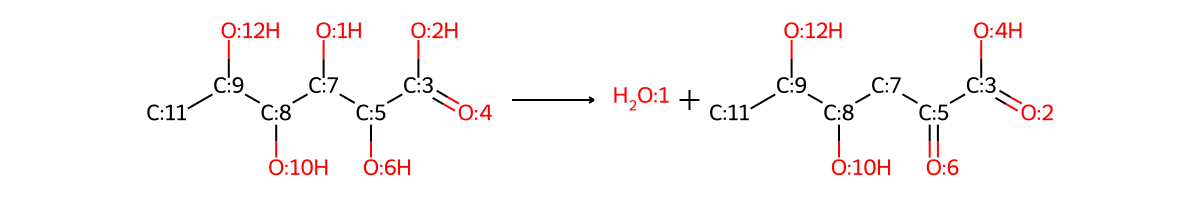

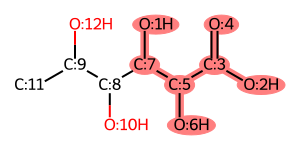

Reaction: 10487


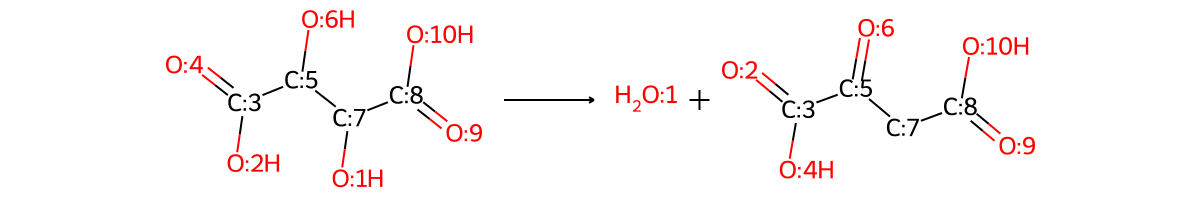

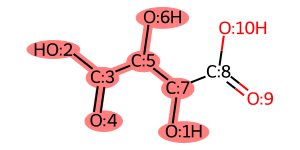

Reaction: 1836


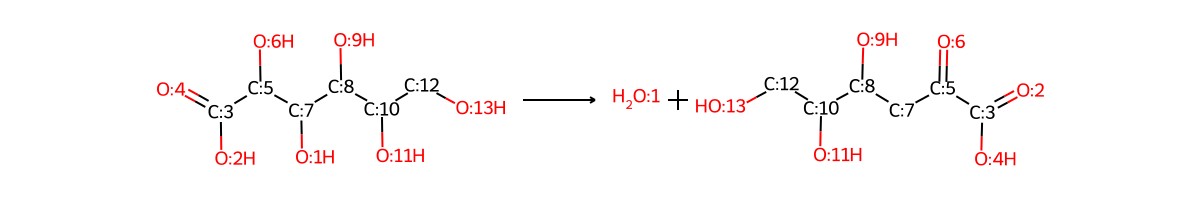

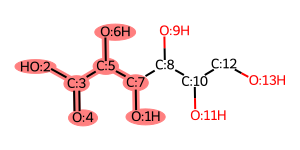

Reaction: 4102


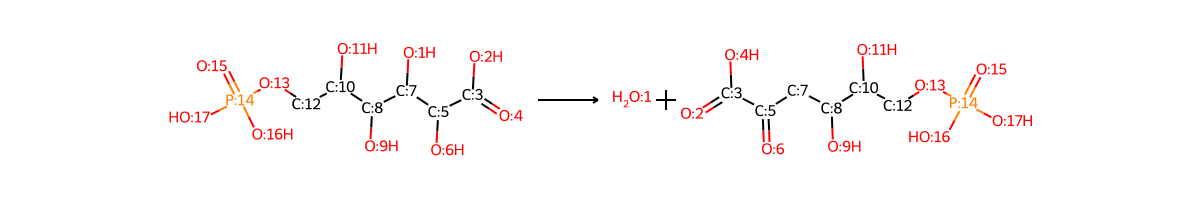

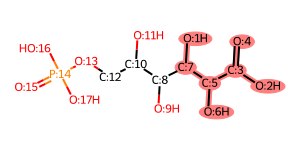

Reaction: 4456


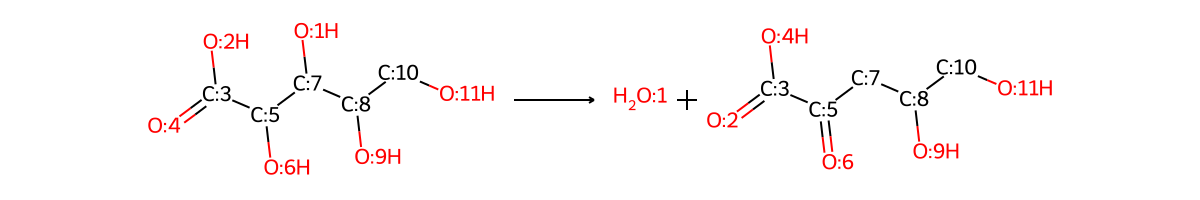

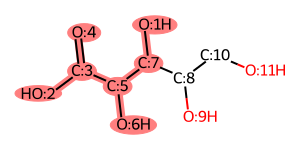

Reaction: 7877


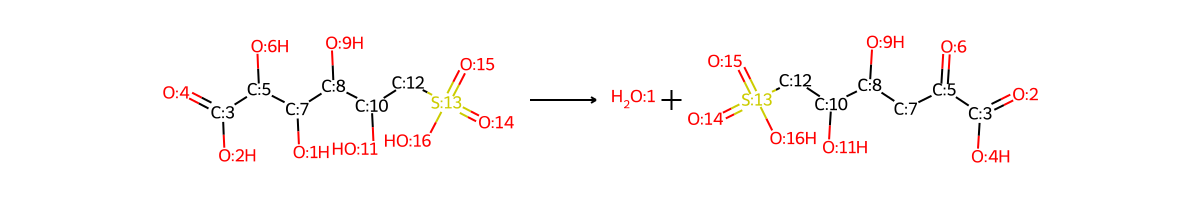

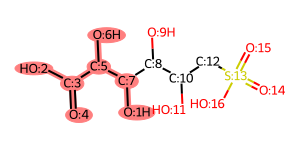

In [16]:
rule_of_i = 841
for _, row in df.loc[df['rule_id'] == rule_of_i].iloc[:10].iterrows():
    print(f"Reaction: {row['rxn_id']}")
    display(SVG(draw_reaction(row["am_smarts"])))
    for smi, rc in zip(row["am_smarts"].split(">>")[0].split("."), row["reaction_center"][0]):
        display(SVG(draw_molecule(smi, size=(300, 150), highlight_atoms=rc)))